In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import collections
import seaborn as sns
import time
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import (KNeighborsClassifier,
                               NeighborhoodComponentsAnalysis)
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn import svm
import tensorflow as tf

In [18]:
random_state = 0

# df = pd.read_csv('Data/BLE_rssi_after_Kalman_Filter_Grid_1.5m_2.5m.csv')
df = pd.read_csv('Data/BLE_rssi_after_FFT_Filter_Grid_1.5m_2.5m.csv')
df.sample(frac=1)


X = df[['beacon' + str(i) for i in range(1, 6)]]
Y = df['location']
# print(Y)
# Split into train/test
X_train, X_test, y_train, y_test = \
    train_test_split(X, Y, test_size=0.3, stratify=Y,
                     random_state=random_state)

________________________________________________________________________________________________________________________________
# Supervised methods with Dimensionality Reduction

Neighborhood Components Analysis (NCA) tries to find a feature space such that a stochastic nearest neighbor algorithm will give the best accuracy. Like LDA, it is a supervised method. One can see that NCA enforces a clustering of the data that is visually meaningful despite the large reduction in dimension.

# Compare PCA and LDA for all data

Text(0.5, 1.0, 'Accuracy with different number of neighbors')

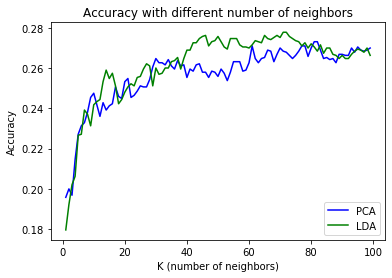

In [23]:
# n_neighbors = 3


# print(X)
dim = len(X['beacon1'])
n_classes = len(np.unique(Y))

# Reduce dimension to 2 with PCA
pca = make_pipeline(StandardScaler(),
                    PCA(n_components=2, random_state=random_state))

# Reduce dimension to 2 with LinearDiscriminantAnalysis
lda = make_pipeline(StandardScaler(),
                    LinearDiscriminantAnalysis(n_components=2))

# Reduce dimension to 2 with NeighborhoodComponentAnalysis
nca = make_pipeline(StandardScaler(),
                    NeighborhoodComponentsAnalysis(n_components=2,
                                                   random_state=random_state))

pca_accuaracy = []
lda_accuaracy = []
nca_accuaracy = []
k = []

# n_neighbors = 35
for n_neighbors in range(1, 100):
    # Use a nearest neighbor classifier to evaluate the methods
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)

    # Make a list of the methods to be compared
    # dim_reduction_methods = [('PCA', pca), ('LDA', lda), ('NCA', nca)]
    dim_reduction_methods = [('PCA', pca), ('LDA', lda)]
    k.append(n_neighbors)
    # plt.figure()
    for i, (name, model) in enumerate(dim_reduction_methods):

        # Fit the method's model
        model.fit(X_train, y_train)

        # Fit a nearest neighbor classifier on the embedded training set
        knn.fit(model.transform(X_train), y_train)

        # Compute the nearest neighbor accuracy on the embedded test set
        acc_knn = knn.score(model.transform(X_test), y_test)

        X_embedded = model.transform(X)

        if i == 0:
            pca_accuaracy.append(acc_knn)
        elif i == 1:
            lda_accuaracy.append(acc_knn)

            


plt.plot(k, pca_accuaracy, 'b')
plt.plot(k, lda_accuaracy, 'g')
# plt.plot(k, nca_accuaracy, 'r')
plt.ylabel("Accuracy")
plt.xlabel("K (number of neighbors)")
plt.legend(['PCA', 'LDA'], loc='lower right')
plt.title("Accuracy with different number of neighbors")

# Compare PCA and LDA for 1100 rows of the dataaet

<ipython-input-17-6c337d2fb137>:68: MatplotlibDeprecationWarning: Unrecognized location 'down right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  plt.legend(['PCA', 'LDA', 'NCA'], loc='down right')


Text(0.5, 1.0, 'Accuracy with different number of neighbors')

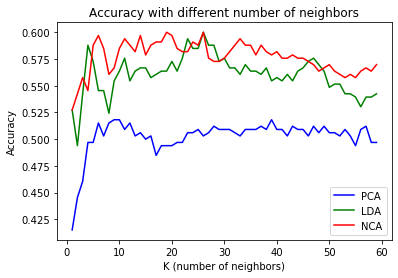

In [17]:
# df = df[:1100]
X_prim = df[:1100][['beacon' + str(i) for i in range(1, 6)]]
Y_prim = df[:1100]['location']
# print(Y)
# Split into train/test
X_train_prim, X_test_prim, y_train_prim, y_test_prim = \
    train_test_split(X_prim, Y_prim, test_size=0.3, stratify=Y_prim,
                     random_state=random_state)
dim = len(X['beacon1'])
n_classes = len(np.unique(Y_prim))

# Reduce dimension to 2 with PCA
pca = make_pipeline(StandardScaler(),
                    PCA(n_components=2, random_state=random_state))

# Reduce dimension to 2 with LinearDiscriminantAnalysis
lda = make_pipeline(StandardScaler(),
                    LinearDiscriminantAnalysis(n_components=2))

# Reduce dimension to 2 with NeighborhoodComponentAnalysis
nca = make_pipeline(StandardScaler(),
                    NeighborhoodComponentsAnalysis(n_components=2,
                                                   random_state=random_state))


pca_accuaracy = []
lda_accuaracy = []
nca_accuaracy = []
k = []

# n_neighbors = 3
for n_neighbors in range(1, 60):
    # Use a nearest neighbor classifier to evaluate the methods
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)

    # Make a list of the methods to be compared
    dim_reduction_methods = [('PCA', pca), ('LDA', lda), ('NCA', nca)]
#     dim_reduction_methods = [('PCA', pca), ('LDA', lda)]
    k.append(n_neighbors)
    for i, (name, model) in enumerate(dim_reduction_methods):

        # Fit the method's model
        model.fit(X_train_prim, y_train_prim)

        # Fit a nearest neighbor classifier on the embedded training set
        knn.fit(model.transform(X_train_prim), y_train_prim)

        # Compute the nearest neighbor accuracy on the embedded test set
        acc_knn = knn.score(model.transform(X_test_prim), y_test_prim)
#         print(y_test)
        # Embed the data set in 2 dimensions using the fitted model
        X_embedded = model.transform(X_prim)

        if i == 0:
            pca_accuaracy.append(acc_knn)
        elif i == 1:
            lda_accuaracy.append(acc_knn)
        elif i == 2:
            nca_accuaracy.append(acc_knn)



plt.plot(k, pca_accuaracy, 'b')
plt.plot(k, lda_accuaracy, 'g')
plt.plot(k, nca_accuaracy, 'r')
plt.ylabel("Accuracy")
plt.xlabel("K (number of neighbors)")
plt.legend(['PCA', 'LDA', 'NCA'], loc='lower right')
plt.title("Accuracy with different number of neighbors")

# pca_lda_knn function

In [19]:
def pca_lda_knn(X, Y, X_train, X_test, y_train, y_test):
    dim = len(X['beacon1'])
    n_classes = len(np.unique(Y))
    # Reduce dimension to 2 with PCA
    pca = make_pipeline(StandardScaler(),
                        PCA(n_components=2, random_state=random_state))

    # Reduce dimension to 2 with LinearDiscriminantAnalysis
    lda = make_pipeline(StandardScaler(),
                        LinearDiscriminantAnalysis(n_components=2))

    # Reduce dimension to 2 with NeighborhoodComponentAnalysis
    nca = make_pipeline(StandardScaler(),
                        NeighborhoodComponentsAnalysis(n_components=2,
                                                       random_state=random_state))

    pca_accuaracy = []
    lda_accuaracy = []
    nca_accuaracy = []
    k = []
    y_pred_pca = []
    y_pred_lda = []
    for n_neighbors in range(1, 100):
        # Use a nearest neighbor classifier to evaluate the methods
        knn = KNeighborsClassifier(n_neighbors=n_neighbors)

        # Make a list of the methods to be compared
        # dim_reduction_methods = [('PCA', pca), ('LDA', lda), ('NCA', nca)]
        dim_reduction_methods = [('PCA', pca), ('LDA', lda)]
        k.append(n_neighbors)
        for i, (name, model) in enumerate(dim_reduction_methods):

            # Fit the method's model
            model.fit(X_train, y_train)

            # Fit a nearest neighbor classifier on the embedded training set
            knn.fit(model.transform(X_train), y_train)

            # Compute the nearest neighbor accuracy on the embedded test set
            y_pred_each = model.transform(X_test)
            acc_knn = knn.score(y_pred_each, y_test)
            y_pred_each = knn.predict(model.transform(X_test))
            X_embedded = model.transform(X)

            if i == 0:
                pca_accuaracy.append(acc_knn)
                y_pred_pca.append(y_pred_each)
            elif i == 1:
                lda_accuaracy.append(acc_knn)
                y_pred_lda.append(y_pred_each)
    return y_pred_pca[pca_accuaracy.index(max(pca_accuaracy))], y_pred_lda[lda_accuaracy.index(max(lda_accuaracy))], max(pca_accuaracy), max(lda_accuaracy)


In [70]:
print(pca_lda_knn(X, Y, X_train, X_test, y_train, y_test))

0.2731070496083551
(array([115,  54,  93, ..., 113, 115, 115], dtype=int64), array([115,  55,  96, ...,  91, 114, 115], dtype=int64), 0.2731070496083551, 0.27780678851174934)


_______________________________________________________________________________________________________________________________
# Decision Tree

Decision tree learning is one of the predictive modelling approaches used in statistics, data mining and machine learning. It uses a decision tree to go from observations about an item to conclusions about the item's target value

In [20]:
def Decision_Tree(X, Y, X_train, X_test, y_train, y_test):
    clf = tree.DecisionTreeClassifier()
    clf = clf.fit(X, Y)
    clf.predict(X_test)
    clf = tree.DecisionTreeClassifier()

    #Train the model using the training sets
    clf.fit(X_train, y_train)

    #Predict the response for test dataset
    y_pred = clf.predict(X_test)

    return y_pred ,metrics.accuracy_score(y_test, y_pred)

In [70]:
print(Decision_Tree(X, Y, X_train, X_test, y_train, y_test))

(array([112,  59,  98, ...,  95, 115, 115], dtype=int64), 0.47571801566579636)


________________________________________________________________________________________________________________________________
# Gradian Boosting

Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.When a decision tree is the weak learner, the resulting algorithm is called gradient boosted trees, which usually outperforms random forest. It builds the model in a stage-wise fashion like other boosting methods do, and it generalizes them by allowing optimization of an arbitrary differentiable loss function.

In [21]:
def Gradian_Boosting(X, Y, X_train, X_test, y_train, y_test):
    lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]
    test_accuracy = []
    best_y_pred = []
    for learning_rate in lr_list:
        gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
        gb_clf.fit(X_train, y_train)
        y_pred = gb_clf.predict(X_test)
        best_y_pred.append(y_pred)
#         print("Learning rate: ", learning_rate)
#         print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
#         print("Accuracy score (test): {0:.3f}".format(gb_clf.score(X_test, y_test)))
#         print("X_test value is : ", y_pred)
        test_accuracy.append(gb_clf.score(X_test, y_test))

#     fig = plt.figure()
#     ax = fig.add_axes([0,0,1,1])
#     ax.bar(lr_list, test_accuracy)
#     ax.set_xlabel('Learning Rate')
#     ax.set_ylabel('Accuracy')
#     ax.set_title('Accuracy value with different learning rates')
#     plt.show()
    return best_y_pred[test_accuracy.index(max(test_accuracy))], max(test_accuracy)

Learning rate:  0.05
Accuracy score (training): 0.479
Accuracy score (test): 0.402
X_test value is :  [115  59  97 ...  74 115 115]
Learning rate:  0.075
Accuracy score (training): 0.501
Accuracy score (test): 0.429
X_test value is :  [114  59  97 ...  74 115 115]
Learning rate:  0.1
Accuracy score (training): 0.526
Accuracy score (test): 0.439
X_test value is :  [114  59  98 ...  73 114 115]
Learning rate:  0.25
Accuracy score (training): 0.594
Accuracy score (test): 0.479
X_test value is :  [115  59  98 ...  74 112 115]
Learning rate:  0.5
Accuracy score (training): 0.070
Accuracy score (test): 0.069
X_test value is :  [117  38 117 ... 118 117 117]
Learning rate:  0.75
Accuracy score (training): 0.020
Accuracy score (test): 0.018
X_test value is :  [93 37 76 ... 93 93 93]
Learning rate:  1
Accuracy score (training): 0.074
Accuracy score (test): 0.071
X_test value is :  [114  35  17 ...  72 114 114]


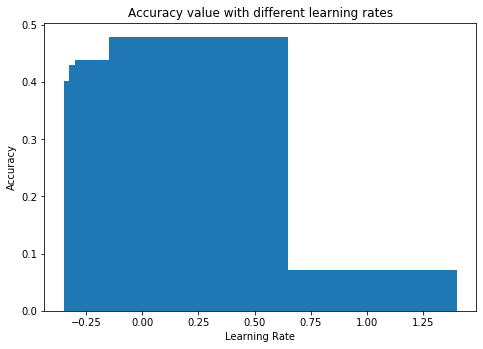

(array([115,  59,  98, ...,  74, 112, 115], dtype=int64), 0.4793733681462141)


In [16]:
print(Gradian_Boosting(X, Y, X_train, X_test, y_train, y_test))

________________________________________________________________________________________________________________________________
# XGBoost Classifier

XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way. The same code runs on major distributed environment (Hadoop, SGE, MPI) and can solve problems beyond billions of examples.

In [22]:
def XGBoost(X, Y, X_train, X_test, y_train, y_test):
    xgb_clf = XGBClassifier()
    xgb_clf.fit(X_train, y_train)
    #Predict the response for test dataset
    y_pred = xgb_clf.predict(X_test)
    score = xgb_clf.score(X_test, y_test)
    return y_pred, score

In [68]:
print(XGBoost(X, Y, X_train, X_test, y_train, y_test))

[11:51:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
(array([114,  59,  98, ...,  74, 114, 115], dtype=int64), 0.6026109660574412)


________________________________________________________________________________________________________________________________
# k-Nearest Neighbors

K-Nearest Neighbors algorithm is used for classification and regression. In both cases, the input consists of the k closest training examples in data set.

In [23]:
def KNN(X, Y, X_train, X_test, y_train, y_test):
    dict_classifications = {}
    for i in range(1, 20):
        #Create KNN Classifier
        knn = KNeighborsClassifier(n_neighbors=i)

        #Train the model using the training sets
        knn.fit(X_train, y_train)

        #Predict the response for test dataset
        y_pred = knn.predict(X_test)
        # Model Evaluation for k=5

        # Model Accuracy, how often is the classifier correct?
        acc = metrics.accuracy_score(y_test, y_pred)
        if acc not in dict_classifications:
            dict_classifications[acc] = [y_test, y_pred, i]

    od = collections.OrderedDict(sorted(dict_classifications.items()))
    
    return od[list(od.keys())[0]][1], list(od.keys())[0], od[list(od.keys())[0]][2]


In [42]:
print(KNN(X, Y, X_train, X_test, y_train, y_test))

(array([113,  57,  98, ...,  95, 112,  90], dtype=int64), 0.5629242819843342, 2)


________________________________________________________________________________________________________________________________
# Logistic Regression

Logistic model is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick. This can be extended to model several classes of events such as determining whether an image contains a cat, dog, lion, etc

In [24]:
def Logistic_Regression(X, Y, X_train, X_test, y_train, y_test):
    model = LogisticRegression()
    model.fit(X_train, y_train)

    solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
    scores = []
    score = 0
    for i in range(len(solvers)):
        model = LogisticRegression(solver= solvers[i])
        model.fit(X_train, y_train)
        score = model.score(X_test, y_test)
        if scores == []:
            scores = [score, solvers[i], model.predict(X_test)]
        elif score > scores[0]:
            scores = [score, solvers[i], model.predict(X_test)]
    return scores[2], scores[0], scores[1]


In [55]:
print(Logistic_Regression(X, Y, X_train, X_test, y_train, y_test))

c:\users\ashkan\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\ashkan\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
c:\users\ashkan\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHE

(array([ 98,  59,  97, ...,  74,  94, 115], dtype=int64), 0.38851174934725846, 'newton-cg')


c:\users\ashkan\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


________________________________________________________________________________________________________________________________
# Suport Vector Machine (SVM)

SVM is a supervised machine learning model that uses classification algorithms for two-group classification problems. After giving an SVM model sets of labeled training data for each category, they’re able to categorize new text

In [25]:
def SVM(X, Y, X_train, X_test, y_train, y_test):
    # kernel_type = ['linear', 'poly', 'rbf', 'sigmoid']
    kernel_type = ['rbf', 'sigmoid']
    # gamma_type = ['auto']
    gamma_type = ['scale', 'auto']

    scores = []

    for i in range(len(kernel_type)):
        for j in range(len(gamma_type)):
            for k in range(1, 5):
                model = svm.SVC(C=k, gamma=gamma_type[j], kernel=kernel_type[i])
                model.fit(X_train, y_train)
                score = model.score(X_test, y_test)
                if scores == []:
                    scores = [score, k, gamma_type[j], kernel_type[i], model.predict(X_test)]
                elif score > scores[0]:
                    scores = [score, k, gamma_type[j], kernel_type[i], model.predict(X_test)]

#     for i in range(5):
#         print(scores[i])
    return scores[4], scores[0], scores[0]  


In [26]:
def SVM_rbf(X, Y, X_train, X_test, y_train, y_test):
    clf = svm.SVC(kernel='rbf') # RBF Kernel

    #Train the model using the training sets
    clf.fit(X_train, y_train)

    #Predict the response for test dataset
    y_pred = clf.predict(X_test)

    return y_pred, metrics.accuracy_score(y_test, y_pred)

In [5]:
print(SVM_rfb(X, Y, X_train, X_test, y_train, y_test))

(array([115,  59,  98, ...,  74, 114, 115], dtype=int64), 0.5409921671018276)


________________________________________________________________________________________________________________________________
# Functio for loading LSTM NN model

In [27]:
def load_LSTM_NN(X, Y, X_train, X_test, y_train, y_test):
    
    model = tf.keras.models.load_model('LSTM_saved_model.h5')
    model.summary()
    one_hot = pd.get_dummies(df['location'])
    x = df[['beacon1', 'beacon2', 'beacon3', 'beacon4', 'beacon5']].to_numpy()
    x = x[:6350].reshape([-1, 5, 5])
    y = one_hot[:6350].to_numpy()
    y = y.reshape([-1, 5, 55])
    y = np.sum(y, 1)
    for label in y:
        max_value_index = np.argmax(label)
        label[max_value_index] = 1
        label[0:max_value_index] = 0
        label[max_value_index + 1:] = 0
    X_train_prim, X_test_prim, y_train_prim, y_test_prim = train_test_split(x, y, test_size=0.3, random_state=42)

    Y_pred = model.predict(X_test_prim)
    y_pred = np.argmax(Y_pred, axis=1)
#     print(y_pred)
    score, accuracy = model.evaluate(X_test_prim, y_test_prim)

    return y_pred, accuracy

In [122]:
print(load_LSTM_NN(X, Y, X_train, X_test, y_train, y_test))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 150)               93600     
_________________________________________________________________
dense (Dense)                (None, 55)                8305      
Total params: 101,905
Trainable params: 101,905
Non-trainable params: 0
_________________________________________________________________
[14  5 21 30 39 45 19 20 25 42  0 50 14  7 21 41 21 35  2 20 30 21 40 45
 20 44  8 27  0 49 14 21 38 33 44 23 19 22 21  5 20 39 20 30 40 35  4 40
 37 21 12 42 45 14 51  2 23  0 25 18 50 21 30 21 29 17 45 45 37 14 41  9
 25  7 36 40  3 42 25 21 34 49  9  3 22 20 14 20  0  5 44 22 44 30 30 44
 23 22 21 20  5  2 45 49 44 13 21 25  2  8 19 19 32 15  5 48 45  7 30 38
  2 35  8  5 40 24 50 44 30 41  7 29 23 34 17 41 14 38 42 30 21 44 14 49
 22 14 50 38 49 30  0 21 42 20 17 29  8 25 20  2 25 42 18 20 42 21 20 10
 

________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________
# Compare all mentioned supervised learning algorithms for different number of rows of the dataset

# Step1: 
At first, a list is generated which includes dataframes with different number of rows and labels

In [28]:
loc_list = [df['location'][0]]

for item in df['location']:
    if item != loc_list[-1]:
        loc_list.append(item)
new_df = df
new_loc_list = loc_list
all_df = []
global_counter = 0
for i in range(len(loc_list)):
    df_prim = []
    counter = 0
    flag = 0
    j = 0
    while flag == 0 and global_counter < len(df['location']):
        if new_df['location'][global_counter] != new_loc_list[0]:
            flag = 1
        else:
            global_counter += 1
        j += 1
    new_df = new_df.iloc[counter + 1:]
    new_loc_list = new_loc_list[1:]
    all_df.append(df.iloc[0:global_counter])
# print(len(all_df[0]['location']))
# for i in range(len(all_df)):
#     print(all_df[i])
#     print('************************************************')

# Step2:
This code has been provided in order to illustrate accuracy and elapsed time for each classification method for different number of rows of the dataset 

In [ ]:
dataframes = []
accuracy_pca_knn = []
accuracy_lda_knn = []
accuracy_Decision_Tree = []
accuracy_Gradian_Boosting = []
accuracy_XGBoost = []
accuracy_KNN = []
accuracy_Logistic_Regression = []
accuracy_SVM = []
accuracy_LSTM_NN = []
num_of_rows = []

time_pca_lda_knn = []

time_Decision_Tree = []
time_Gradian_Boosting = []
time_XGBoost = []
time_KNN = []
time_Logistic_Regression = []
time_SVM = []
time_LSTM_NN = []


random_state = 0

df = pd.read_csv('Data/BLE_rssi_after_FFT_Filter_Grid_1.5m_2.5m.csv')
df.sample(frac=1)

# accuracy_LSTM_NN = [0] * int(len(all_df) / 4)
accuracy_LSTM_NN = 0
time_LSTM_NN = 0
X = df[['beacon' + str(i) for i in range(1, 6)]]
Y = df['location']
# print(Y)
# Split into train/test
X_train, X_test, y_train, y_test = \
    train_test_split(X, Y, test_size=0.3, stratify=Y,
                     random_state=random_state)

    
    
for i in range(int(len(all_df)/4)):
    if i == int(len(all_df)/4) - 1:
        df = all_df[-1]
    else:
        df = all_df[i * 4 + 3]
    X = df[['beacon' + str(j) for j in range(1, 6)]]
    Y = df['location']
    # print(Y)
    # Split into train/test
    X_train, X_test, y_train, y_test = \
    train_test_split(X, Y, test_size=0.3, stratify=Y,
                     random_state=random_state)
    
    # execute PCA and LDA for KNN classifier
    time_1 = time.time()
    pca_y_pred, lda_y_pred, pca_accuracy, lda_accuracy = pca_lda_knn(X, Y, X_train, X_test, y_train, y_test)
    time_2 = time.time()
    time_pca_lda_knn.append(time_2 - time_1)
    accuracy_pca_knn.append(pca_accuracy)
    accuracy_lda_knn.append(lda_accuracy)

    
    # execute Decision Tree classifier
    Decision_Tree_y_pred, Decision_Tree_accuracy = Decision_Tree(X, Y, X_train, X_test, y_train, y_test)
    time_3 = time.time()
    time_Decision_Tree.append(time_3 - time_2)
    accuracy_Decision_Tree.append(Decision_Tree_accuracy)

    # execute Gradian Boosting classifier
    Gradian_Boosting_y_pred, Gradian_Boosting_accuracy = Gradian_Boosting(X, Y, X_train, X_test, y_train, y_test)
    time_4 = time.time()
    time_Gradian_Boosting.append(time_4 - time_3)
    accuracy_Gradian_Boosting.append(Gradian_Boosting_accuracy)
    
    # execute XGBoosting classifier
    XGBoost_y_pred, XGBoost_accuracy = XGBoost(X, Y, X_train, X_test, y_train, y_test)
    time_5 = time.time()
    time_XGBoost.append(time_5 - time_4)
    accuracy_XGBoost.append(XGBoost_accuracy)
    
    # execute KNN classifier
    KNN_y_pred, KNN_accuracy, num_of_k_neighbors = KNN(X, Y, X_train, X_test, y_train, y_test)
    time_6 = time.time()
    time_KNN.append(time_6 - time_5)
    accuracy_KNN.append(KNN_accuracy)
    
    # execute Logistic_Regression classifier
    Logistic_Regression_y_pred, Logistic_Regression_accuracy, Logistic_Regression_solver = Logistic_Regression(X, Y, X_train, X_test, y_train, y_test)
    time_7 = time.time()
    time_Logistic_Regression.append(time_7 - time_6)
    accuracy_Logistic_Regression.append(Logistic_Regression_accuracy)
    
    # execute SVM classifier
    SVM_y_pred, SVM_accuracy = SVM_rbf(X, Y, X_train, X_test, y_train, y_test)
    time_8 = time.time()
    time_SVM.append(time_8 - time_7)
    accuracy_SVM.append(SVM_accuracy)

    if i == int(len(all_df)/4) - 1:
        time_9 = time.time()
        LSTM_NN_y_pred, LSTM_NN_accuracy = load_LSTM_NN(X, Y, X_train, X_test, y_train, y_test)
        time_10 = time.time()
        time_LSTM_NN = time_10 - time_9
        accuracy_LSTM_NN = LSTM_NN_accuracy
        num_of_rows.append(len(all_df[-1]['location']))
    else:
        num_of_rows.append(len(all_df[i * 4 + 3]['location']))
    

# b g r c m y k w
plt.plot(num_of_rows, accuracy_pca_knn, 'b')
plt.plot(num_of_rows, accuracy_lda_knn, 'g')
plt.plot(num_of_rows, accuracy_Decision_Tree, 'r')
plt.plot(num_of_rows, accuracy_Gradian_Boosting, 'c')
plt.plot(num_of_rows, accuracy_XGBoost, 'm')
plt.plot(num_of_rows, accuracy_KNN, 'k')
plt.plot(num_of_rows, accuracy_Logistic_Regression, 'y')
plt.plot(num_of_rows, accuracy_SVM, 'grey')
# plt.plot(num_of_rows, accuracy_LSTM_NN, 'w')
plt.scatter([num_of_rows[-1]], [accuracy_LSTM_NN], color='g')
plt.ylabel("Accuracy")
plt.xlabel("Number of rows")
plt.legend(['PCA', 'LDA', 'DT', 'GB', 'XGB', 'KNN', 'LR', 'SVM', 'LSTM'], loc='upper right', borderaxespad=0., prop={'size': 7}, fontsize=8)
plt.title("Accuracy for different number rows")
plt.show()



plt.plot(num_of_rows, time_pca_lda_knn, 'b')
# plt.plot(num_of_rows, time_lda_knn, 'g')
plt.plot(num_of_rows, time_Decision_Tree, 'r')
plt.plot(num_of_rows, time_Gradian_Boosting, 'c')
plt.plot(num_of_rows, time_XGBoost, 'm')
plt.plot(num_of_rows, time_KNN, 'k')
plt.plot(num_of_rows, time_Logistic_Regression, 'y')
plt.plot(num_of_rows, time_SVM, 'grey')
# plt.plot(num_of_rows, accuracy_LSTM_NN, 'w')
# plt.scatter([num_of_rows[-1]], [time_LSTM_NN], color='g')
plt.ylabel("time(sec)")
plt.xlabel("Number of rows")
plt.legend(['PCA', 'DT', 'GB', 'XGB', 'KNN', 'LR', 'SVM'], loc='upper left', borderaxespad=0.)
plt.title("Elapsed time for different number of rows")
plt.show()


c:\users\ashkan\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:19:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\ashkan\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\ashkan\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

[13:19:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\ashkan\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\ashkan\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
c:\users\ashkan\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHE

[13:19:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\ashkan\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\ashkan\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
c:\users\ashkan\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHE

[13:20:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\ashkan\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\ashkan\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
c:\users\ashkan\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHE

[13:20:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\ashkan\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\ashkan\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
c:\users\ashkan\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHE

[13:20:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\ashkan\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\ashkan\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
c:\users\ashkan\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHE

[13:20:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\ashkan\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\ashkan\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
c:\users\ashkan\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHE

[13:21:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\ashkan\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\ashkan\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
c:\users\ashkan\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHE

________________________________________________________________________________________________________________________________

# Compare filtering rssi noise algorithms using KNN and XGBoosting learning mothods

c:\users\ashkan\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:18:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\ashkan\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:18:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\ashkan\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:18:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\ashkan\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:18:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\ashkan\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:18:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


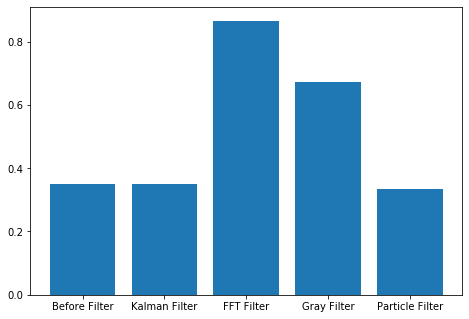

In [16]:
import matplotlib.pyplot as plt
random_state = 0

df = pd.read_csv('Data/BLE_rssi_Before_Filter_Grid_1.5m_2.5m.csv')
df.sample(frac=1)

df_0 = pd.read_csv('Data/BLE_rssi_after_Kalman_Filter_Grid_1.5m_2.5m.csv')
df_0.sample(frac=1)

df_1 = pd.read_csv('Data/BLE_rssi_after_FFT_Filter_Grid_1.5m_2.5m.csv')
df_1.sample(frac=1)

df_2 = pd.read_csv('Data/BLE_rssi_after_Gray_Filter_Grid_1.5m_2.5m.csv')
df_2.sample(frac=1)

df_3 = pd.read_csv('Data/BLE_rssi_after_Particle_Filter_Grid_1.5m_2.5m.csv')
df_3.sample(frac=1)

X = df[['beacon' + str(i) for i in range(1, 6)]]
Y = df['location']

X_0 = df[['beacon' + str(i) for i in range(1, 6)]]
Y_0 = df['location']

X_1 = df_1[['beacon' + str(i) for i in range(1, 6)]]
Y_1 = df_1['location']

X_2 = df_2[['beacon' + str(i) for i in range(1, 6)]]
Y_2 = df_2['location']

X_3 = df_3[['beacon' + str(i) for i in range(1, 6)]]
Y_3 = df_3['location']

X_train, X_test, y_train, y_test = \
    train_test_split(X, Y, test_size=0.3, stratify=Y,
                     random_state=random_state)

X_train_0, X_test_0, y_train_0, y_test_0 = \
train_test_split(X_0, Y_0, test_size=0.3, stratify=Y_0,
                 random_state=random_state)    
    
X_train_1, X_test_1, y_train_1, y_test_1 = \
    train_test_split(X_1, Y_1, test_size=0.3, stratify=Y_1,
                     random_state=random_state)    

X_train_2, X_test_2, y_train_2, y_test_2 = \
    train_test_split(X_2, Y_2, test_size=0.3, stratify=Y_2,
                     random_state=random_state)

X_train_3, X_test_3, y_train_3, y_test_3 = \
    train_test_split(X_3, Y_3, test_size=0.3, stratify=Y_3,
                     random_state=random_state)
    

# For df :
XGBoost_y_pred, XGBoost_accuracy = XGBoost(X, Y, X_train, X_test, y_train, y_test)
# KNN_y_pred, KNN_accuracy, num_of_k_neighbors = KNN(X, Y, X_train, X_test, y_train, y_test)

# For df_0 :
XGBoost_y_pred, XGBoost_accuracy_0 = XGBoost(X_0, Y_0, X_train_0, X_test_0, y_train_0, y_test_0)
# KNN_y_pred, KNN_accuracy_0, num_of_k_neighbors = KNN(X_0, Y_0, X_train_0, X_test_0, y_train_0, y_test_0)

# For df_1 :
XGBoost_y_pred, XGBoost_accuracy_1 = XGBoost(X_1, Y_1, X_train_1, X_test_1, y_train_1, y_test_1)
# KNN_y_pred, KNN_accuracy_1, num_of_k_neighbors = KNN(X_1, Y_1, X_train_1, X_test_1, y_train_1, y_test_1)

# For df_2 :
XGBoost_y_pred, XGBoost_accuracy_2 = XGBoost(X_2, Y_2, X_train_2, X_test_2, y_train_2, y_test_2)
# KNN_y_pred, KNN_accuracy_2, num_of_k_neighbors = KNN(X_2, Y_2, X_train_2, X_test_2, y_train_2, y_test_2)

# For df_3 :
XGBoost_y_pred, XGBoost_accuracy_3 = XGBoost(X_3, Y_3, X_train_3, X_test_3, y_train_3, y_test_3)
# KNN_y_pred, KNN_accuracy_3, num_of_k_neighbors = KNN(X_3, Y_3, X_train_3, X_test_3, y_train_3, y_test_3)



fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['Before Filter', 'Kalman Filter', 'FFT Filter', 'Gray Filter', 'Particle Filter']
students = [XGBoost_accuracy,XGBoost_accuracy_0,XGBoost_accuracy_1,XGBoost_accuracy_2,XGBoost_accuracy_3]
ax.bar(langs,students)
plt.show()


NameError: name 'langes' is not defined

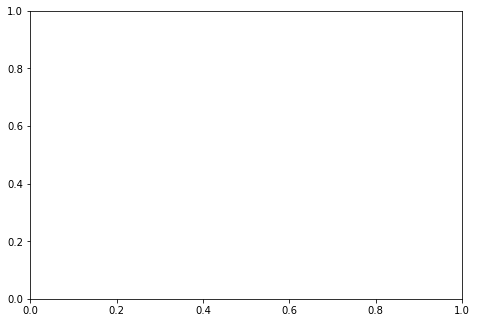

In [5]:
import numpy as np
import matplotlib.pyplot as plt

data = [[30, 25, 50, 20, 30],
[35, 22, 45, 19, 50]]
X = np.arange(5)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['c', 'java', 'python', 'ruby', 'c++']
ax.bar(langes, X + 0.00, data[0], color = 'b', width = 0.25)
ax.bar(langes, X + 0.25, data[1], color = 'g', width = 0.25)


<BarContainer object of 4 artists>

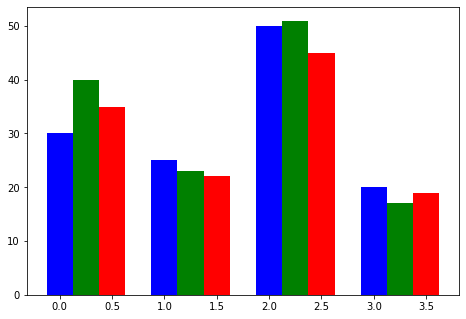

In [6]:
import numpy as np
import matplotlib.pyplot as plt
data = [[30, 25, 50, 20],
[40, 23, 51, 17],
[35, 22, 45, 19]]
X = np.arange(4)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'b', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
ax.bar(X + 0.50, data[2], color = 'r', width = 0.25)

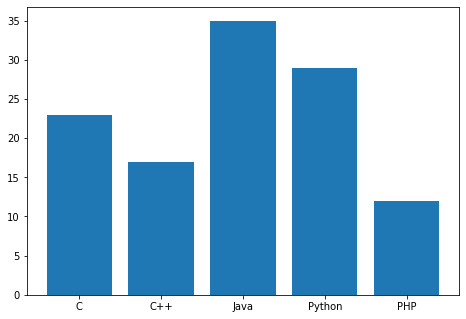

In [7]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['C', 'C++', 'Java', 'Python', 'PHP']
students = [23,17,35,29,12]
ax.bar(langs,students)
plt.show()
